# Week 9 Lecture 2 - Comparing Two Population
We need to compare the two means of a population is call A/B Testing.  We will compare two population means and see if there is any significant difference.


In [28]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *


# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [29]:
births = Table.read_table('baby.csv')
births

Birth Weight | Gestational Days | Maternal Age | Maternal Height | Maternal Pregnancy Weight | Maternal Smoker
120          | 284              | 27           | 62              | 100                       | False
113          | 282              | 33           | 64              | 135                       | False
128          | 279              | 28           | 64              | 115                       | True
108          | 282              | 23           | 67              | 125                       | True
136          | 286              | 25           | 62              | 93                        | False
138          | 244              | 33           | 62              | 178                       | False
132          | 245              | 23           | 65              | 140                       | False
120          | 289              | 25           | 62              | 125                       | False
143          | 299              | 30           | 66              | 136                       | True
140          | 351              | 27           | 68              | 120                       | False
... (1164 rows omitted)

In [30]:
smoking_and_birthweight = births.select('Maternal Smoker', 'Birth Weight')
smoking_and_birthweight

Maternal Smoker | Birth Weight
False           | 120
False           | 113
True            | 128
True            | 108
False           | 136
False           | 138
False           | 132
False           | 120
True            | 143
False           | 140
... (1164 rows omitted)

In [31]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker | count
False           | 715
True            | 459

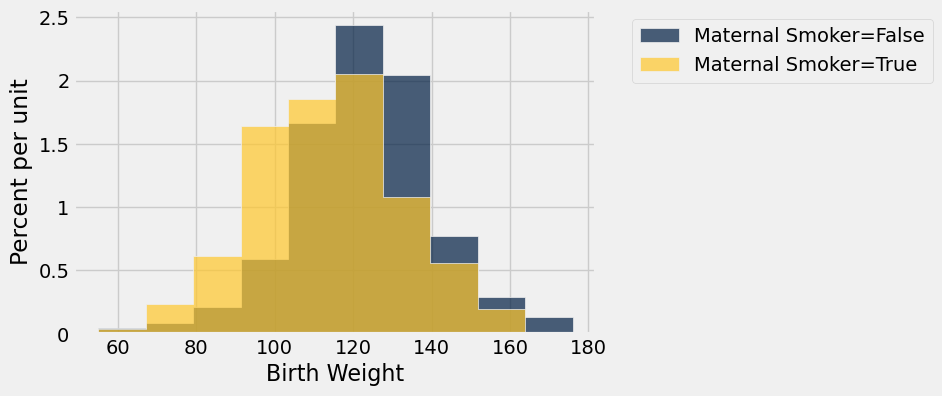

In [32]:
smoking_and_birthweight.hist('Birth Weight', group = 'Maternal Smoker')

# Hypotheses
**Null Hypothesis:**  The birth weights are the same for Maternal Smokers and Maternal Non-Smokers<br>
**Alternative Hypothesis:** In the population, the babies of the mothers who smoke have a lower birth weight, on average, than the babies of the non-smokers.

# Test Statistic
The alternative hypothesis compares the average birth weights of the two groups and says that the average for the mothers who smoke is smaller. Therefore it is reasonable for us to use the difference between the two group means as our statistic.
                                                                                                                                                        

In [33]:
means_table = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_table

Maternal Smoker | Birth Weight average
False           | 123.085
True            | 113.819

In [34]:
means = means_table.column(1)
observed_difference = means.item(1) - means.item(0)
observed_difference

-9.266142572024918

# Create a function
To find the difference between the two means, you will create a function to pass the Table and the column name to be grouped by.  It will return the difference of the average of the two groups.

In [35]:
def difference_of_means(table, group_label):
    """Takes: name of table,
    column label that indicates the group to which the row#  belongs
    Returns: Difference of mean birth weights of the two groups"""
    reduced = table.select('Birth Weight', group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

In [36]:
difference_of_means(births, 'Maternal Smoker')

-9.266142572024918

# Predicting the Statistic Under the Null Hypothesis
Shuffle the labels randomly among the mothers to see if the difference in the mean birth weights is similiar to the difference of the birth weights from the sample taken.

In [37]:
smoking_and_birthweight

Maternal Smoker | Birth Weight
False           | 120
False           | 113
True            | 128
True            | 108
False           | 136
False           | 138
False           | 132
False           | 120
True            | 143
False           | 140
... (1164 rows omitted)

In [38]:
# select 1,174 rows without replacement to simulate shuffling the labels.
shuffled_labels = smoking_and_birthweight.sample(with_replacement = False).column(0)
shuffled_labels

array([ True, False, False, ...,  True, False, False], dtype=bool)

In [39]:
original_and_shuffled = smoking_and_birthweight.with_column('Shuffled Label', shuffled_labels)
original_and_shuffled

Maternal Smoker | Birth Weight | Shuffled Label
False           | 120          | True
False           | 113          | False
True            | 128          | False
True            | 108          | True
False           | 136          | False
False           | 138          | True
False           | 132          | False
False           | 120          | True
True            | 143          | False
False           | 140          | True
... (1164 rows omitted)

In [40]:
shuffled_only = original_and_shuffled.select('Birth Weight','Shuffled Label')
shuffled_group_means = shuffled_only.group('Shuffled Label', np.average)
shuffled_group_means

Shuffled Label | Birth Weight average
False          | 119.341
True           | 119.651

In [41]:
difference_of_means(original_and_shuffled, 'Shuffled Label')

0.31015738074562194

In [42]:
difference_of_means(original_and_shuffled, 'Maternal Smoker')

-9.266142572024918

In [43]:
def one_simulated_difference_of_means():
    """Returns: Difference between mean birthweights
    of babies of smokers and non-smokers after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = births.sample(with_replacement=False).column('Maternal Smoker')
    
    # table of birth weights and shuffled labels
    shuffled_table = births.select('Birth Weight').with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, 'Shuffled Label')   

In [50]:
one_simulated_difference_of_means()

0.8789402318814012

# Permutation Test
Tests based on random permutations of the data are called permutation tests. We are performing one in this example. In the cell below, we will simulate our test statistic – the difference between the average birth weight of the two randomly formed groups – many times and collect the differences in an array.

In [51]:
differences = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means()
    differences = np.append(differences, new_difference)                               

# Conclusion of Test
Based on the random simulation what can we conclude.


Observed Difference: -9.266142572024918


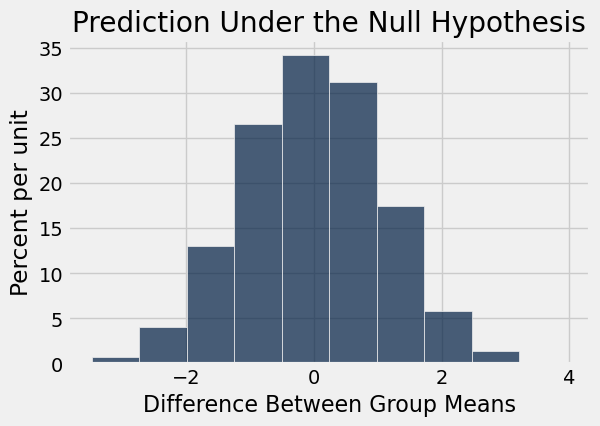

In [53]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
plt.title('Prediction Under the Null Hypothesis');

In [56]:
differences.min()

-3.478151042856922

The average difference is 0.  The minimum value using random chance differences is much less than the -9.266.  Therefore, we would say there is a difference in birth weights between Mother who smoked and those do not smoke.

In [57]:
# Empirical p-value
empirical_p = np.count_nonzero(differences <= observed_difference) / repetitions
empirical_p

0.0

# Another Permutation Test
Using the Maternal Smoking column we can compare other number values such as age.

In [60]:
births

Birth Weight | Gestational Days | Maternal Age | Maternal Height | Maternal Pregnancy Weight | Maternal Smoker
120          | 284              | 27           | 62              | 100                       | False
113          | 282              | 33           | 64              | 135                       | False
128          | 279              | 28           | 64              | 115                       | True
108          | 282              | 23           | 67              | 125                       | True
136          | 286              | 25           | 62              | 93                        | False
138          | 244              | 33           | 62              | 178                       | False
132          | 245              | 23           | 65              | 140                       | False
120          | 289              | 25           | 62              | 125                       | False
143          | 299              | 30           | 66              | 136                       | True
140          | 351              | 27           | 68              | 120                       | False
... (1164 rows omitted)

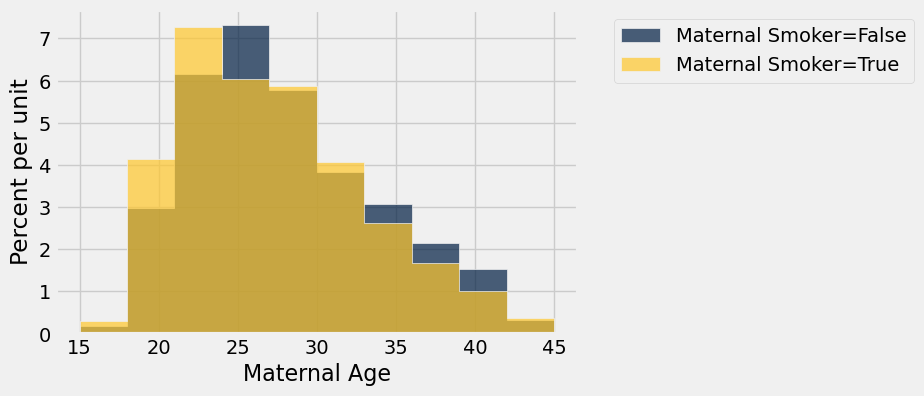

In [59]:
smoking_and_age = births.select('Maternal Smoker', 'Maternal Age')
smoking_and_age.hist('Maternal Age', group = 'Maternal Smoker')

Maternal Smoker | Maternal Age average
False           | 27.5441
True            | 26.7364

In [89]:
def difference_of_means(table, group_label):
    """Takes: name of table,
    column label that indicates the group to which the row belongs
    Returns: Difference of mean ages of the two groups"""
    reduced = table.select('Maternal Age', group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

In [90]:
observed_age_difference = difference_of_means(births, 'Maternal Smoker' )
observed_age_difference

-0.8076725017901509

In [91]:
def one_simulated_difference_of_means():
    """Returns: Difference between mean ages
    of smokers and non-smokers after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = births.sample(with_replacement=False).column('Maternal Smoker')
    
    # table of ages and shuffled labels
    shuffled_table = births.select('Maternal Age').with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, 'Shuffled Label')   

In [93]:
one_simulated_difference_of_means()

0.01509514450691185

In [94]:
age_differences = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means()
    age_differences = np.append(age_differences, new_difference)

In [97]:
age_differences.min()

-1.3621463503816464

In [98]:
age_differences.max()

1.2134741075917539

Observed Difference: -0.8076725017901509


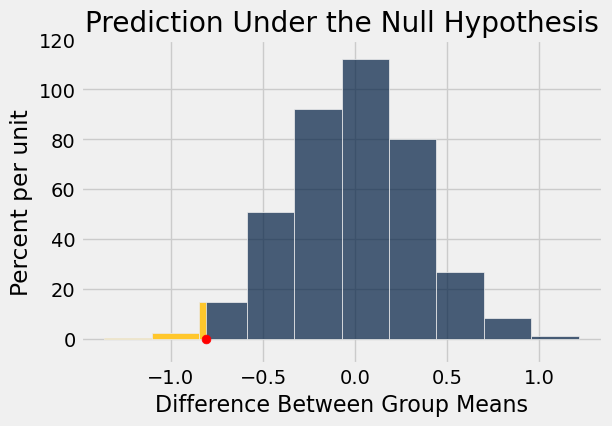

In [96]:
Table().with_column(
    'Difference Between Group Means', age_differences).hist(
    right_end = observed_age_difference)

# Plotting parameters; you can ignore the code below
plt.ylim(-0.1, 1.2)
plt.scatter(observed_age_difference, 0, color='red', s=40, zorder=3)
plt.title('Prediction Under the Null Hypothesis')
print('Observed Difference:', observed_age_difference)

In [99]:
# Empirical P value
empirical_p = np.count_nonzero(age_differences <= observed_age_difference)/5000
empirical_p

0.0083999999999999995

# Conclusion
Smokers are younger than non-smokers when giving birth

# Causality
Our methods for comparing two samples have a powerful use in the analysis of randomized controlled experiments. Since the treatment and control groups are assigned randomly in such experiements, differences in their outcomes can be compared to what would happen just due to chance if the treatment had no effect at all. If the observed differences are more marked than what we would predict as purely due to chance, we will have evidence of causation.
<br><br>
Null Hypothesis: There is no difference between the two groups with low-back pain.<br>
Alternative Hypothesis: The bta group has reduced low-back pain.
<br><br>
Eight weeks after the start of the study, nine of the 15 in the treatment group and two of the 16 in the control group had pain relief (according to a precise definition used by the researchers). These data are in the table bta and appear to show that the treatment has a clear benefit.

In [100]:
bta = Table.read_table('bta.csv')
bta.show()

In [101]:
bta.group('Group', sum)

Group     | Result sum
Control   | 2
Treatment | 9

In [102]:
bta.group('Group', np.average)

Group     | Result average
Control   | 0.125
Treatment | 0.6

# is the difference due to chance
If each participant had a ticket that either assigned them to the control group or treatment group what would be the results?

In [104]:
# table of possible outcomes
observed_outcomes = Table.read_table("outcomes.csv")
observed_outcomes.show()

# Hypotheses
**Null Hypothesis:** The distribution of all 31 potential “treatment” outcomes **is the same as** that of all 31 potential “control” outcomes. Botulinum toxin A does nothing different from saline; the difference in the two samples is just due to chance.
<br>
**Alternative Hypothesis:** The distribution of 31 potential “treatment” outcomes **is different from** that of the 31 control outcomes. The treatment does something different from the control.



# Test Statistic
Absolute difference in percentages that showed improvement in lower back pain.

In [105]:
bta.group('Group', np.average)

Group     | Result average
Control   | 0.125
Treatment | 0.6

In [106]:
observed_proportions = bta.group('Group', np.average).column(1)
observed_distance = abs(observed_proportions.item(0) - observed_proportions.item(1))
observed_distance

0.475

In [107]:
def distance(table, group_label):
    reduced = table.select('Result', group_label)
    proportions = reduced.group(group_label, np.average).column(1)
    return abs(proportions.item(1) - proportions.item(0))

In [108]:
distance(bta, 'Group')

0.475

# Using Randon Occurrence for Null Hypothesis


In [110]:
shuffled_labels = bta.sample(with_replacement=False).column(0)
shuffled_labels

array(['Control', 'Treatment', 'Control', 'Treatment', 'Treatment',
       'Control', 'Control', 'Control', 'Treatment', 'Control',
       'Treatment', 'Control', 'Treatment', 'Treatment', 'Treatment',
       'Treatment', 'Treatment', 'Treatment', 'Control', 'Control',
       'Control', 'Treatment', 'Control', 'Control', 'Treatment',
       'Control', 'Control', 'Control', 'Control', 'Treatment', 'Treatment'],
      dtype='<U9')

In [111]:
bta_with_shuffled_labels = bta.with_column('Shuffled Label', shuffled_labels)
bta_with_shuffled_labels.show()

In [114]:
distance(bta_with_shuffled_labels, 'Shuffled Label')

0.041666666666666685

In [115]:
distance(bta_with_shuffled_labels, 'Group')

0.475

# Permutation Test



In [116]:
def one_simulated_distance():
    shuffled_labels = bta.sample(with_replacement = False
                                                    ).column('Group')
    shuffled_table = bta.select('Result').with_column(
        'Shuffled Label', shuffled_labels)
    return distance(shuffled_table, 'Shuffled Label') 

In [122]:
one_simulated_distance()

0.3

In [123]:
distances = make_array()

repetitions = 20000
for i in np.arange(repetitions):
    new_distance = one_simulated_distance()
    distances = np.append(distances, new_distance)

In [124]:
distances.min()

0.041666666666666685

In [125]:
distances.max()

0.73333333333333328

# Conclusion of the Test

Observed Distance 0.475


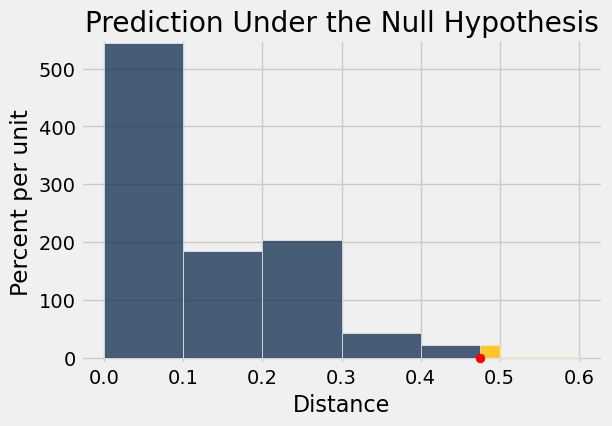

In [127]:
Table().with_column('Distance', distances).hist(
    bins = np.arange(0, 0.7, 0.1), left_end = observed_distance)
# Plotting parameters; you can ignore the code below
plt.ylim(-0.1, 5.5)
plt.scatter(observed_distance, 0, color='red', s=40, zorder=3)
plt.title('Prediction Under the Null Hypothesis')
print('Observed Distance', observed_distance)

In [128]:
empirical_p = np.count_nonzero(distances >= observed_distance) / repetitions
empirical_p

0.0101

If the p-value is lower than that determined at the beginning of the experiment would be significant, then it would prove that there is a statistical significant difference in the two groups results.  Since the study was small, we need to do a meta-analysis (combine studies).  The meta-analysis showed there was not a statistically significant difference.

# Deflategate
Pressure is often measured in pounds per square inch (psi). NFL rules stipulate that game balls must be inflated to have pressures in the range 12.5 psi and 13.5 psi. Each team plays with 12 balls. Teams have the responsibility of maintaining the pressure in their own footballs, but game officials inspect the balls. Before the start of the AFC game, all the Patriots’ balls were at about 12.5 psi. Most of the Colts’ balls were at about 13.0 psi. However, these pre-game data were not recorded.
<br><br>
At half-time, all the game balls were collected for inspection. Two officials, **Clete Blakeman and Dyrol Prioleau**, measured the pressure in each of the balls.
<br><br>
Here are the data. Each row corresponds to one football. Pressure is measured in psi. **The Patriots ball that had been intercepted by the Colts was not inspected at half-time**. Nor were most of the Colts’ balls – the officials simply ran out of time and had to relinquish the balls for the start of second half play.


In [129]:
football = Table.read_table('deflategate.csv')
football.show()

In [130]:
football = football.with_column(
    'Combined', (football.column(1)+football.column(2))/2
    ).drop(1, 2)
football.show()

In [131]:
np.ones(11)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [132]:
patriots_start = 12.5 * np.ones(11)
colts_start = 13 * np.ones(4)
start = np.append(patriots_start, colts_start)
start

array([ 12.5,  12.5,  12.5,  12.5,  12.5,  12.5,  12.5,  12.5,  12.5,
        12.5,  12.5,  13. ,  13. ,  13. ,  13. ])

In [133]:
drop = start - football.column('Combined')
football = football.with_column('Pressure Drop', drop)
football.show()

In [134]:
football = football.drop('Combined')
football.group('Team', np.average)

Team     | Pressure Drop average
Colts    | 0.46875
Patriots | 1.20227

# Hypotheses
**Null Hypothesis:** Pressure dropped by chance.<br>
**Alternative Hypothesis:** Patriot pressure dropp was too large<br>

# Test Statistic
Average drop fro Patriots - average drop for Colts

In [136]:
observed_means = football.group('Team', np.average).column(1)

observed_difference = observed_means.item(1) - observed_means.item(0)
observed_difference

0.733522727272728

In [137]:
# Difference of Means function
def difference_of_means(table, group_label):
    reduced = table.select('Pressure Drop', group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

In [138]:
difference_of_means(football, 'Team')

0.733522727272728

# Null Hypothesis Simulation


In [139]:
shuffled_labels = football.sample(with_replacement=False).column(0)
original_and_shuffled = football.with_column('Shuffled Label', shuffled_labels)
original_and_shuffled.show()

In [146]:
difference_of_means(original_and_shuffled, 'Shuffled Label')

0.13693181818181888

In [147]:
difference_of_means(original_and_shuffled, 'Team')

0.733522727272728

# Permutation Test

In [149]:
def one_simulated_difference():
    shuffled_labels = football.sample(with_replacement = False
                                                    ).column('Team')
    shuffled_table = football.select('Pressure Drop').with_column(
        'Shuffled Label', shuffled_labels)
    return difference_of_means(shuffled_table, 'Shuffled Label')   

In [150]:
differences = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference()
    differences = np.append(differences, new_difference)

# Conclusion of Test

Observed Difference: 0.733522727272728


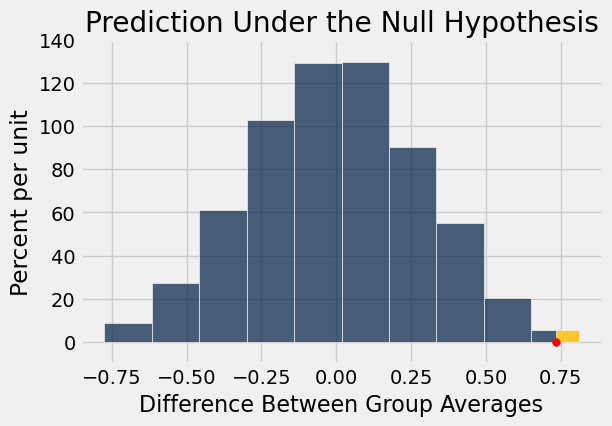

In [152]:
Table().with_column(
    'Difference Between Group Averages', differences).hist(
    left_end = observed_difference
)
plt.ylim(-0.1, 1.4)
plt.scatter(observed_difference, 0, color='red', s=30, zorder=3)
plt.title('Prediction Under the Null Hypothesis')
print('Observed Difference:', observed_difference)

In [153]:
empirical_p = np.count_nonzero(differences >= observed_difference) / 10000
empirical_p

0.0025000000000000001